# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:

        - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
        - balcony — число балконов
        - ceiling_height — высота потолков (м)
        - cityCenters_nearest — расстояние до центра города (м)
        - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
        - first_day_exposition — дата публикации
        - floor — этаж
        - floors_total — всего этажей в доме
        - is_apartment — апартаменты (булев тип)
        - kitchen_area — площадь кухни в квадратных метрах (м²)
        - last_price — цена на момент снятия с публикации
        - living_area — жилая площадь в квадратных метрах (м²)
        - locality_name — название населённого пункта
        - open_plan — свободная планировка (булев тип)
        - parks_around3000 — число парков в радиусе 3 км
        - parks_nearest — расстояние до ближайшего парка (м)
        - ponds_around3000 — число водоёмов в радиусе 3 км
        - ponds_nearest — расстояние до ближайшего водоёма (м)
        - rooms — число комнат
        - studio — квартира-студия (булев тип)
        - total_area — общая площадь квартиры в квадратных метрах (м²)
        - total_images — число фотографий квартиры в объявлении


### Откройте файл с данными и изучите общую информацию. 

In [1]:
#!pip install pandas-profiling

In [2]:
#библиотеки
import pandas as pd
#from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
#df.hist(figsize=(15, 20))

In [7]:
# profile = ProfileReport(df)
#profile

In [8]:
# df.hist(figsize=(15, 20))

### Предобработка данных

In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

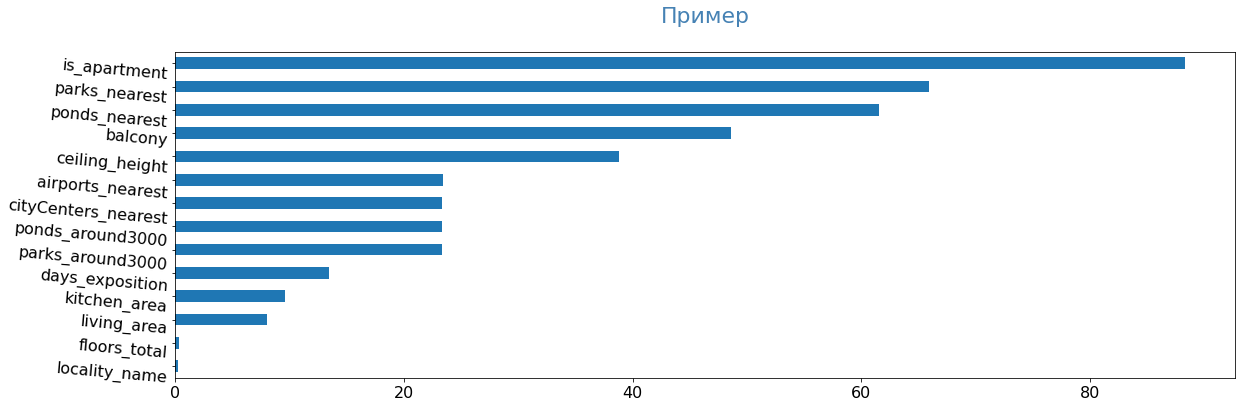

In [11]:
pass_value_barh(df)

In [12]:
#работа с пропусками
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(False)

df['parks_nearest'][df['parks_around3000'].isna() & df['parks_nearest'].isna()] == 0
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)
df['parks_nearest'] = df['parks_nearest'].fillna(df.groupby('parks_around3000')['parks_nearest'].transform('mean'))

df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(value=0)

df = df.dropna(subset=['last_price', 'floors_total'])

In [13]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9118
floors_total               0
living_area             1870
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2231
balcony                    0
locality_name             48
airports_nearest        5532
cityCenters_nearest     5509
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3172
dtype: int64

Вывод: при работе с пропусками было обнаружено следующее.

Пропуски были обнаружены в колонке с числом балконов, скорей всего это означает, что в квартирах нет балконов, поэтому такие пропуски заменили на значение 0. 

Столбец is_apartment имел пропуски, скорей всего такие квартиры просто не являются апартаментами, поэтому заменили на значение False, тип стал bool. 

Обнаружила пропуски в столбцах  parks_around3000 и parks_nearest, заметила если есть пропуск в parks_around3000, то он есть и в parks_nearest, поэтому сначала пропуски и там и там заполнила на 0, потом все остальные пропуски в parks_nearest заменила на медианное значение, для каждого отддельного числа парков parks_around3000, т.е медианным значением по категории. 

Пропуски в ponds_around3000 и ponds_nearest везде заменила на 0, так как пропуски встречаются одновременно и там и там, это значит нету по близости водоемов и как следствее растояние до них нулевое, были пропуски отдельно в колонке ponds_nearest, но для них было нулевое значение в колонке parks_around3000, ситуация та же - нет водоемов растояние 0. 

Так же есть пропуски в колонках days_exposition, cityCenters_nearest, airports_nearest, kitchen_area, living_area, ceiling_height для них не нашла закономерности для заполнения, да и в основном количество пропусков не сильно большое относительно всего DataFreme. 

In [14]:
#изменение типов данных
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['last_price'] = df['last_price'].astype('int64')
df['floors_total'] = df['floors_total'].astype('int64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

In [16]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.00,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,3114.25,0,0.0,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.00,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.00,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.00,1,48.0,121.0


Вывод: Были изменены тыпы данных. 

В колонке first_day_exposition изменен тип данных на datetime64, для того чтобы программа понимала, что работает с датой и временем. 

В столбце is_apartment сделан тип bool. Для balcony целый тип данных, так как число балконов не может быть вещественным числом, тоже самое сделала и для ponds_around3000. 

In [17]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,14495.000000,23613.000000,21743.000000,23613.000000,21382.000000,23613.000000,18081.000000,18104.000000,23613.000000,23613.000000,23613.000000,23613.000000,20441.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.771495,10.673824,34.462781,5.877313,10.564128,0.593063,28788.008185,14185.084015,0.468810,2220.351332,0.590480,198.852158,180.884839
std,5.681541,1.090172e+07,35.648988,1.078380,1.261445,6.597173,22.037433,4.873539,5.904316,0.960307,12626.209956,8614.132292,0.748489,1259.373122,0.884436,305.184698,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,601.000000,0.000000,0.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13093.000000,0.000000,3114.250000,0.000000,0.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37242.000000,16287.000000,1.000000,3114.250000,1.000000,389.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [18]:
# переделала циклом вроде теперь все только названия
names = ['посёлок', 'поселок', 'деревня', 'село',  'посёло',  'посeло' ]
for name in names:
    df['locality_name'] = df['locality_name'].replace(name, '', regex=True).str.strip()


In [19]:
# check
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'городской  Янино-1', 'Парголово',
       'Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'Кудрово', 'Коммунар', 'Колпино', 'городского типа Красный Бор',
       'Гатчина', 'Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'Новое Девяткино', 'Металлострой', 'городского типа Лебяжье',
       'городского типа Сиверский', 'Молодцово',
       'городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'городского типа Ефимовский', 'Плодовое',
       'Заклинье', 'Торковичи', 'Первомайское', 'Красное Село',
       'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет',
       'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'городского типа Рощино', 'Кириши', 'Луга', 'Волосово',
       

In [20]:
# check
df['locality_name'].nunique()

321

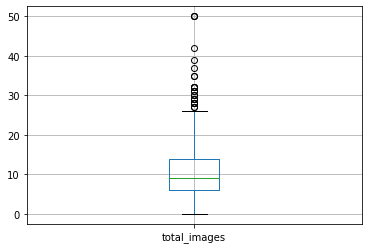

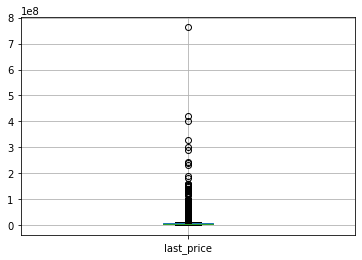

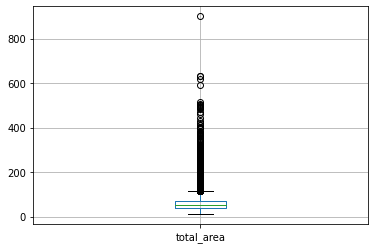

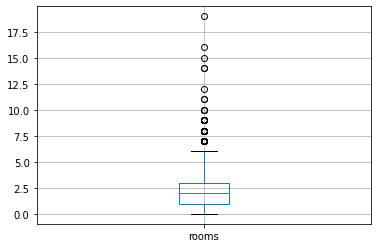

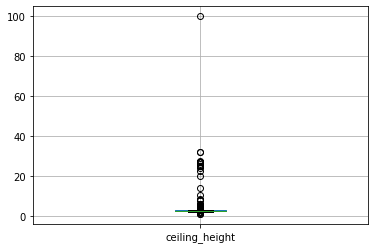

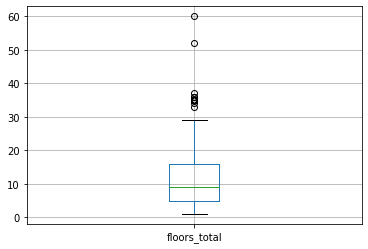

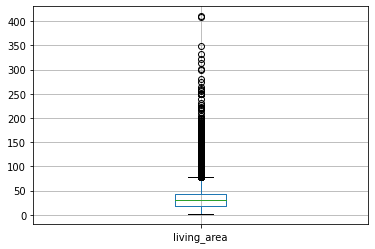

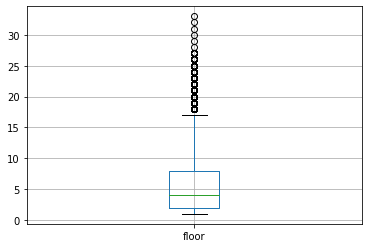

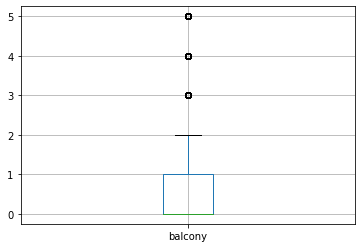

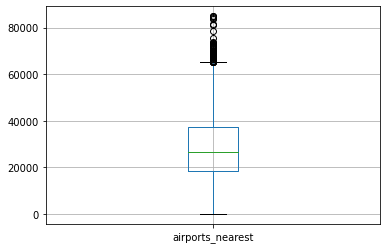

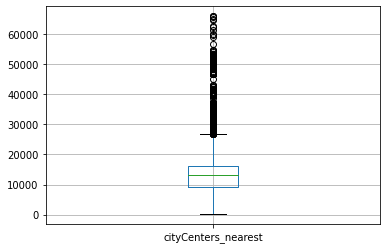

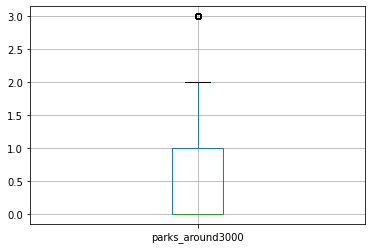

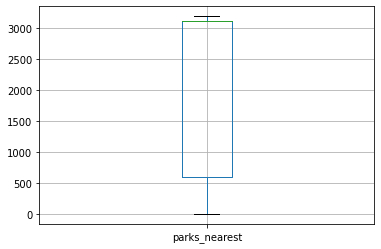

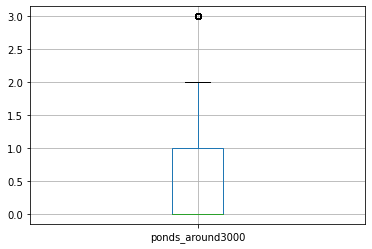

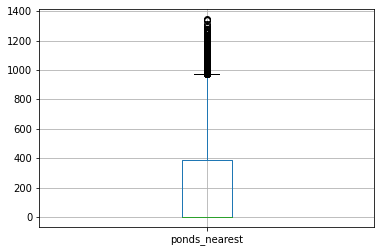

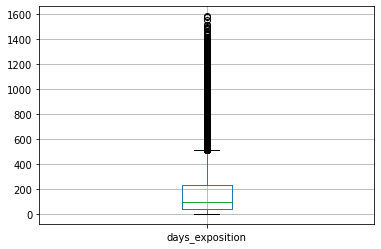

In [21]:
columns = ['total_images', 'last_price', 'total_area',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'balcony',
       'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition']
for column in columns:
    df.boxplot(column=column)
    plt.show()


In [22]:
# check
import matplotlib.pyplot as plt

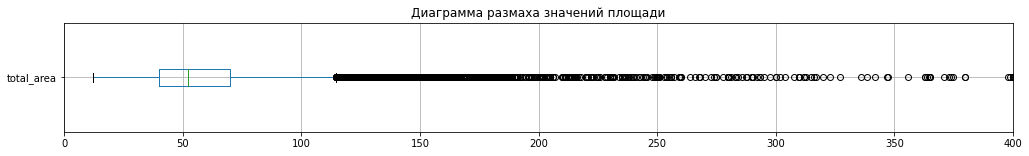

In [23]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = df[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

#### check nan

In [24]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23308 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23308 non-null  int64         
 1   last_price            23308 non-null  int64         
 2   total_area            23308 non-null  float64       
 3   first_day_exposition  23308 non-null  datetime64[ns]
 4   rooms                 23308 non-null  int64         
 5   ceiling_height        14190 non-null  float64       
 6   floors_total          23308 non-null  int64         
 7   living_area           21458 non-null  float64       
 8   floor                 23308 non-null  int64         
 9   is_apartment          23308 non-null  bool          
 10  studio                23308 non-null  bool          
 11  open_plan             23308 non-null  bool          
 12  kitchen_area          21100 non-null  float64       
 13  balcony         

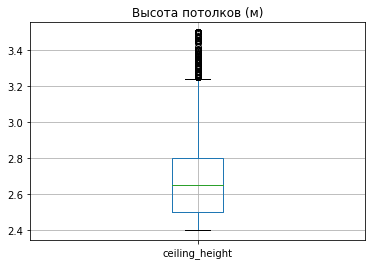

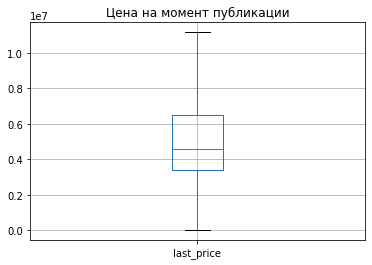

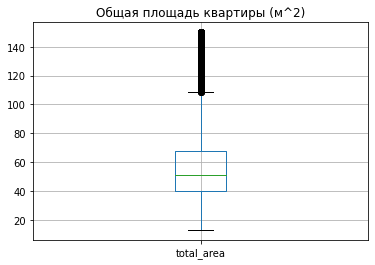

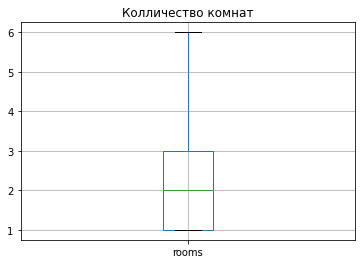

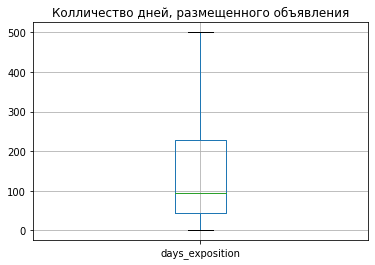

In [25]:
#анамальные значения ceiling_height, last_price, total_area, rooms, days_exposition

list1 = [32.00, 27.00, 25.00, 26.00, 10.3, 24.00, 20.00, 100.00, 22.6, 14.00, 27.5]
list2 = [3.2, 2.7, 2.5, 2.6, 1.03, 2.4, 2.0, 10.0, 2.26, 1.4, 2.75]
df['ceiling_height'] = df['ceiling_height'].replace(list1, list2)

#Высота потолков по статистике от 2,4м до 3,1м. Расчитыем сколько процентов составляют значения за пределами 2,4 и 3,1. 
#Цены на квартиры в момент публикации слишком огромные, расчитаем какой процент квартир выше 12,5мил.
len(df.query('ceiling_height <= 2.4 or ceiling_height >= 3.5')) / len(df) # примернно 1%  очень мало, поэтому такие выбросы можно удалить
len(df.query('last_price >=12500000')) / len(df)# 8% значений больше 12,5мил. 
len(df.query('total_area >= 150')) / len(df) #1% таких отклонений, хоть и если смотреть по диаграмме размаха upper 108.25, тогда все выбросы составляют 4%, хоть это тоже достаточно мало, уберем прям совсем явные выбросы.
len(df.query('rooms >= 6')) / len(df) #0,1%
#очень много выбросов заметила еще в days_exposition

#задаем основное условие фильтрации, + прибавляем условие не трогать записи с пропусками
df = df.loc[((df['ceiling_height'] >= 2.4) & (df['ceiling_height'] <= 3.5)) | (df['ceiling_height'].isna())] 

print('до удаления', df.info())

df = df.query('(total_area <= 150) and (total_area > 10) and (rooms <= 6) and (rooms > 0)')
df = df.loc[(df['living_area'] > 10) | (df['living_area'].isna())] 
print('после удаления', df.info())

Q1 = df.last_price.quantile(0.25)
Q3 = df.last_price.quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df['last_price'] = df['last_price'].clip(upper=upper)

Q1 = df.days_exposition.quantile(0.25)
Q3 = df.days_exposition.quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df['days_exposition'] = df['days_exposition'].clip(upper=upper)


df.boxplot(column='ceiling_height').set_title('Высота потолков (м)')
plt.show()
df.boxplot(column='last_price').set_title('Цена на момент публикации')
plt.show()
df.boxplot(column='total_area').set_title('Общая площадь квартиры (м^2)')
plt.show()
df.boxplot(column='rooms').set_title('Колличество комнат')
plt.show()
df.boxplot(column='days_exposition').set_title('Колличество дней, размещенного объявления')
plt.show()

In [26]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          8800
floors_total               0
living_area             1777
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            1943
balcony                    0
locality_name             44
airports_nearest        5397
cityCenters_nearest     5377
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2955
dtype: int64

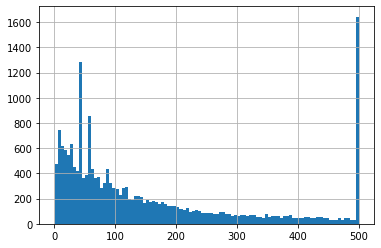

In [27]:
# check
df['days_exposition'].hist(bins = 100);

In [28]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22565.000000,2.256500e+04,22565.000000,22565.000000,13765.000000,22565.000000,20788.000000,22565.000000,20622.000000,22565.000000,17168.000000,17188.000000,22565.000000,22565.000000,22565.000000,22565.000000,19610.000000
mean,9.838910,5.233170e+06,56.555386,2.012143,2.696120,10.739685,32.328948,5.885442,10.151779,0.596632,28895.895096,14493.913835,0.448039,2247.076113,0.566940,195.589497,157.171545
std,5.634912,2.618007e+06,22.584461,0.926923,0.214645,6.593467,15.200838,4.878259,4.890368,0.960728,12763.870533,8540.194937,0.727323,1248.857805,0.866055,304.747843,153.334638
min,0.000000,1.219000e+04,13.000000,1.000000,2.400000,1.000000,10.080000,1.000000,1.300000,0.000000,0.000000,287.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,18400.500000,9815.000000,0.000000,619.000000,0.000000,0.000000,45.000000
50%,9.000000,4.590000e+06,51.100000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,27038.500000,13265.000000,0.000000,3114.250000,0.000000,0.000000,94.000000
75%,14.000000,6.500000e+06,67.500000,3.000000,2.800000,16.000000,41.500000,8.000000,11.530000,1.000000,37434.000000,16433.000000,1.000000,3114.250000,1.000000,378.000000,227.000000
max,50.000000,1.115000e+07,150.000000,6.000000,3.500000,60.000000,128.000000,33.000000,93.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,500.000000


Вывод: Удаление не яыных дубликатов и выбрасов. 

Для столбца locality_name изменила вид записи населенных пунктов, убрала все слова связанные с поселком и т.д. оставила только название самих городов и поселков, для удобства работы с ними в дальнейшем, т.е. нет повторов по типу «поселок Рябово» и «поселок городского типа Рябово» теперь это все просто Рябово. 

Анамальные значения в ceiling_height, total_area и rooms убрала срезом, так как высота потолков не может быть 10 или 100 метров, максимум взяла 3,1, общая площадь до 150кв.м., хоть и для площади все равно остались выбросы (это видно по boxplot), я считаю что площадь в 120-150кв.м. может существовать. Н у количество комнат меньше 6, если комнат 10 врятли это квартиры, скорей всего какое нибуть объщежитие уже. 

У last_price было очень много выбрасов, т.е. прям цены в 700мил.р., что врятли может быть, поэтому я расчитала квартили и заменила все выбрасы на наибольшее значение 3 квартиля. Тоже самое сделала и для days_exposition. 

#### check gap

In [29]:
# check
data = df.copy()

In [30]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22565 non-null  int64         
 1   last_price            22565 non-null  int64         
 2   total_area            22565 non-null  float64       
 3   first_day_exposition  22565 non-null  datetime64[ns]
 4   rooms                 22565 non-null  int64         
 5   ceiling_height        13765 non-null  float64       
 6   floors_total          22565 non-null  int64         
 7   living_area           20788 non-null  float64       
 8   floor                 22565 non-null  int64         
 9   is_apartment          22565 non-null  bool          
 10  studio                22565 non-null  bool          
 11  open_plan             22565 non-null  bool          
 12  kitchen_area          20622 non-null  float64       
 13  balcony         

In [31]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,565.00","22,565.00","13,765.00","19,610.00","22,565.00","20,788.00","20,622.00","22,565.00","22,565.00"
min,1.00,13.00,2.40,1.00,"12,190.00",10.08,1.30,1.00,1.00
max,6.00,150.00,3.50,500.00,"11,150,000.00",128.00,93.00,33.00,60.00


In [32]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7928
2,7831
3,5622
4,994
5,168
6,22


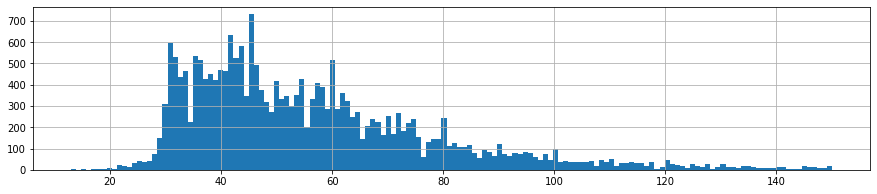

In [33]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

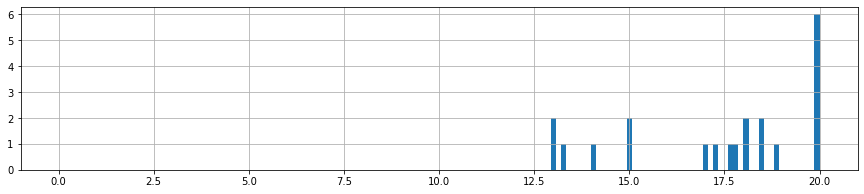

In [34]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (0, 20));

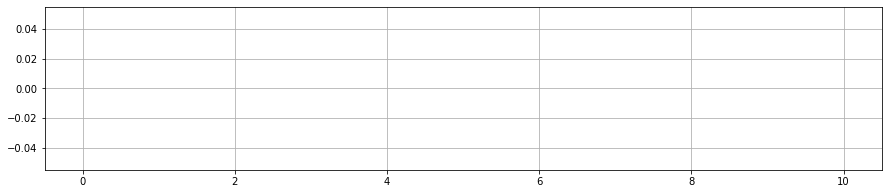

In [35]:
# check
df.living_area.hist(bins = 15, figsize = (15,3), range = (0,10));

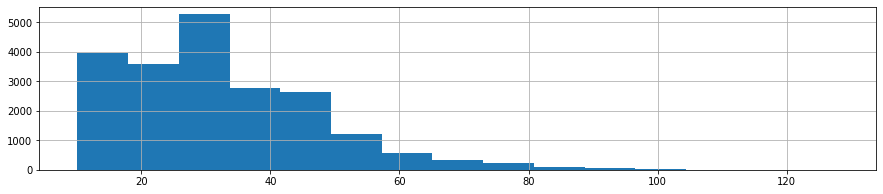

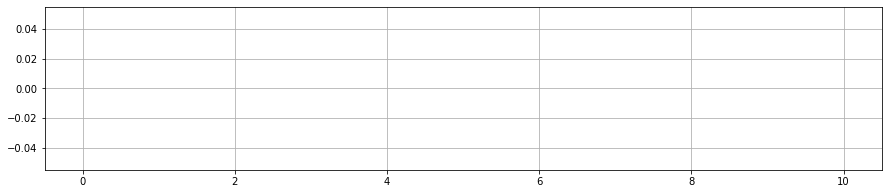

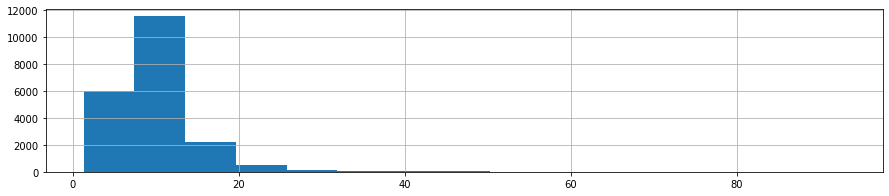

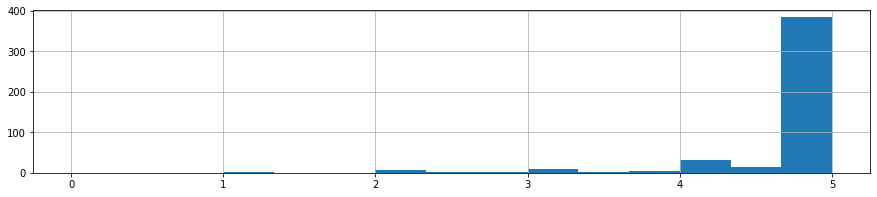

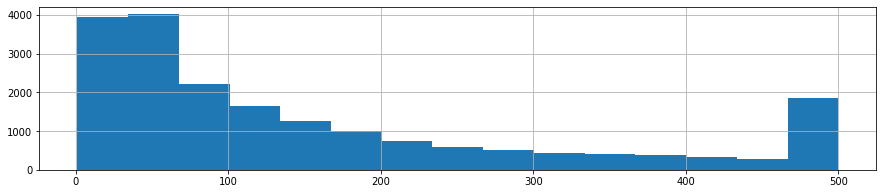

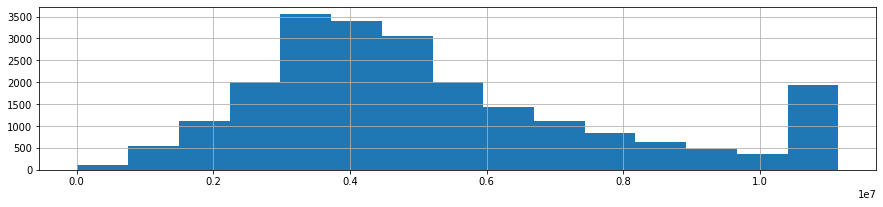

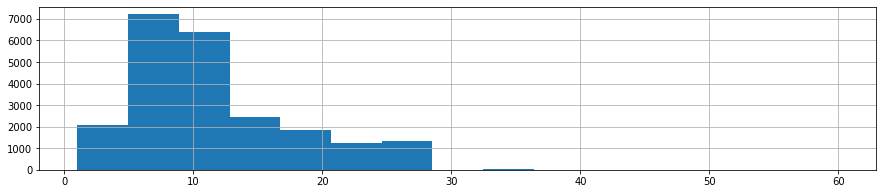

In [36]:
#остались аномалии и редкости (в т.ч. и хвосты) в колонках: 
#'total_area', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'
df.living_area.hist(bins = 15, figsize = (15,3))
plt.show()
df.living_area.hist(bins = 15, figsize = (15,3), range = (0,10))
plt.show()
df.kitchen_area.hist(bins = 15, figsize = (15,3))
plt.show()
df.kitchen_area.hist(bins = 15, figsize = (15,3), range = (0,5))
plt.show()
df.days_exposition.hist(bins = 15, figsize = (15,3)) # аномальные значения в коцуе, 
#так как значения лужащие выше 75 процентиль выше заменили на самое крайнее большое значение 75 процентиля.
plt.show()
df.last_price.hist(bins = 15, figsize = (15,3)) # аномальные значения в коцуе, 
#так как значения лужащие выше 75 процентиль выше заменили на самое крайнее большое значение 75 процентиля.
plt.show()
df.floors_total.hist(bins = 15, figsize = (15,3)) # не стала убирать редкие значения, посчитала что дом в 35 этажей возможен 
plt.show()


df = df.query('total_area >= 20')
df = df.loc[(df['living_area'] >= 8) | (df['living_area'].isna())] 
df = df.loc[(df['kitchen_area'] >= 4) | (df['kitchen_area'].isna())]



In [37]:
#'days_exposition', 'last_price', 'floors_total'
#квартира за 12 тыс. руб. или здание в 60 этажей, в старом, но очень маленьком городе для такого небоскреба

df = df.loc[(df['days_exposition'] >= 3) | (df['days_exposition'].isna())] 
df = df.loc[(df['last_price'] >= 500000) | (df['last_price'].isna())] 
df = df.loc[(df['floors_total'] < 60) | (df['floors_total'].isna())] 


In [38]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,21.01,2.40,3.00,"560,384.00",11.00,3.80,1.00,2.00
0.01,1.00,27.26,2.50,4.00,"1,000,000.00",13.50,5.00,1.00,2.00
0.5,2.00,51.10,2.65,94.00,"4,590,000.00",30.00,9.00,4.00,9.00
0.99,4.00,132.00,3.40,500.00,"11,150,000.00",81.04,30.00,23.00,26.00
0.9988,5.00,148.58,3.50,500.00,"11,150,000.00",100.06,46.85,26.00,33.92


In [39]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,508.00","22,508.00","13,735.00","19,556.00","22,508.00","20,745.00","20,583.00","22,508.00","22,508.00"
min,1.00,20.00,2.40,3.00,"500,000.00",10.08,4.00,1.00,1.00
max,6.00,150.00,3.50,500.00,"11,150,000.00",128.00,93.00,33.00,52.00


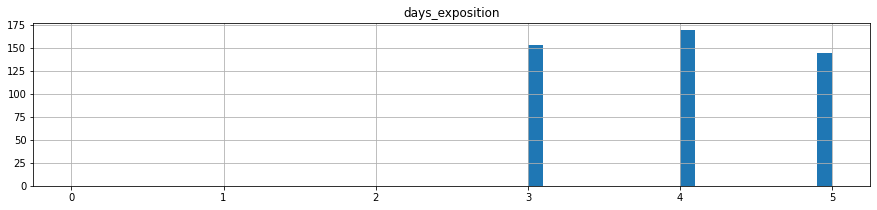

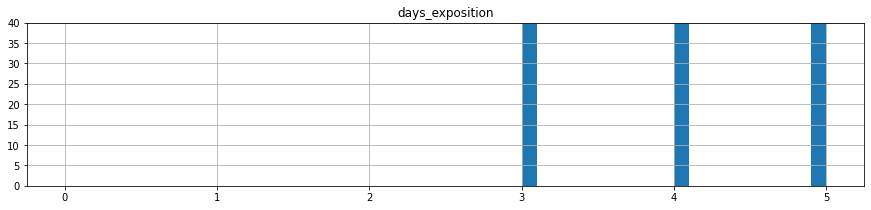

In [40]:
# check
df.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

df.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

### Посчитайте и добавьте в таблицу новые столбцы

In [41]:
#цена одного квадратного метра
df['price_one_meter'] = df['last_price'] / df['total_area']

#день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
df['day_week'] = df['first_day_exposition'].dt.weekday

#месяц публикации объявления
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

#год публикации объявления
df['year'] = df['first_day_exposition'].dt.strftime('%Y')

#тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type(type):
    if type['floor'] == 1:
        return 'первый'
    elif  type['floor'] == type['floors_total']:
        return 'последний'
    else: 
        return 'другой'
df['type_floor'] = df.apply(floor_type, axis=1)

#расстояние в км до центра города
df['kilometers_cityCenters_nearest'] = np.round(df['cityCenters_nearest'] / 1000, decimals = 0)


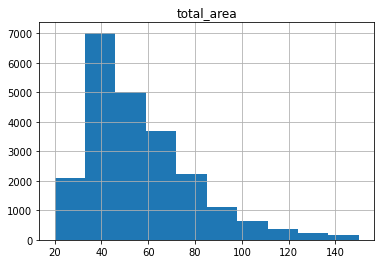

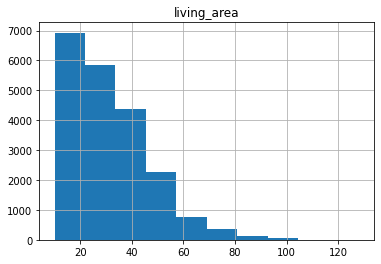

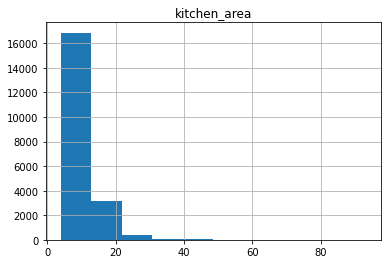

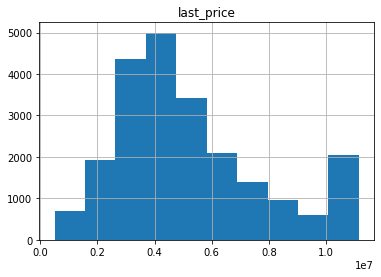

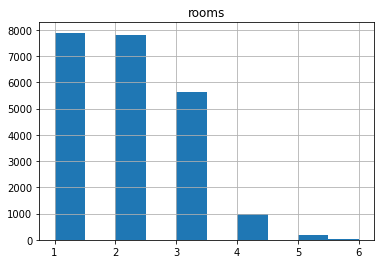

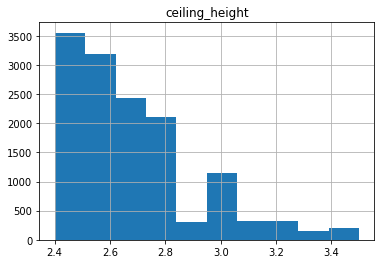

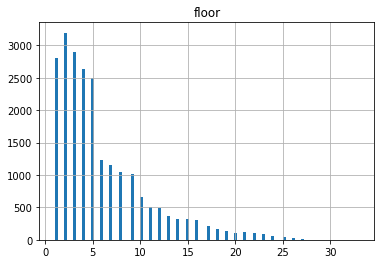

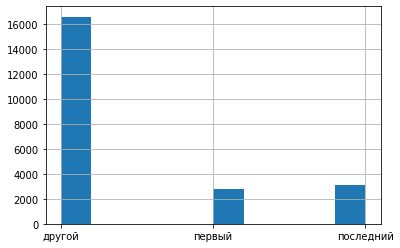

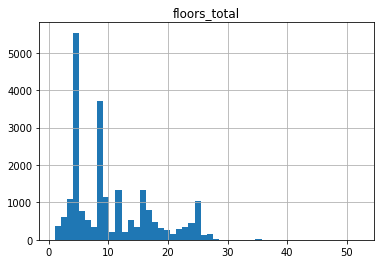

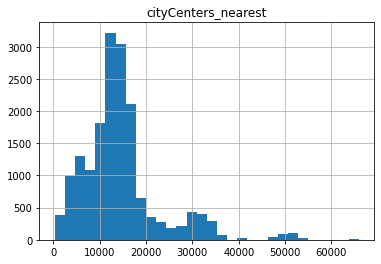

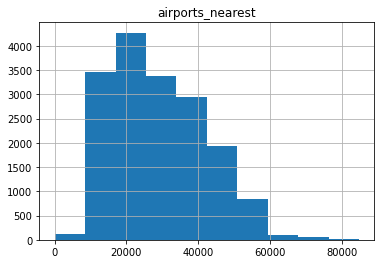

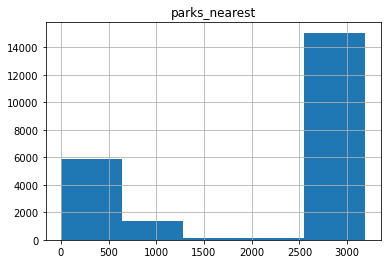

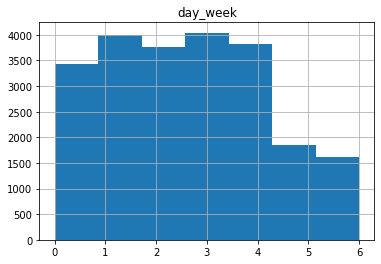

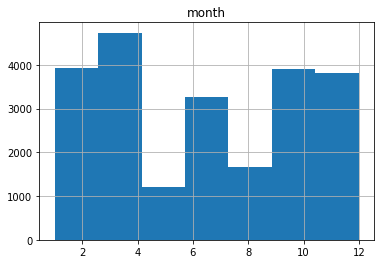

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_week,month,kilometers_cityCenters_nearest
count,22508.000000,2.250800e+04,22508.000000,22508.000000,13735.000000,22508.000000,20745.000000,22508.000000,20583.000000,22508.000000,...,17152.000000,22508.000000,22508.000000,22508.000000,22508.000000,19556.000000,22508.000000,22508.000000,22508.000000,17152.000000
mean,9.843967,5.239683e+06,56.615929,2.013862,2.696015,10.742403,32.350994,5.887640,10.161536,0.597521,...,14498.062792,0.448463,2246.310256,0.567221,195.634308,157.326652,92888.644935,2.569264,6.396304,14.492071
std,5.634125,2.615810e+06,22.565744,0.927162,0.214588,6.581601,15.205057,4.876567,4.882515,0.961353,...,8539.164674,0.727599,1249.125340,0.866309,304.723390,153.410786,29609.636240,1.791071,3.491295,8.546630
min,0.000000,5.000000e+05,20.000000,1.000000,2.400000,1.000000,10.080000,1.000000,4.000000,0.000000,...,287.000000,0.000000,1.000000,0.000000,0.000000,3.000000,9615.384615,0.000000,1.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,...,9815.750000,0.000000,619.000000,0.000000,0.000000,45.000000,75757.575758,1.000000,3.000000,10.000000
50%,9.000000,4.599000e+06,51.200000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,13265.000000,0.000000,3114.250000,0.000000,0.000000,94.000000,93232.434683,3.000000,6.000000,13.000000
75%,14.000000,6.500000e+06,67.600000,3.000000,2.800000,16.000000,41.500000,8.000000,11.590000,1.000000,...,16446.000000,1.000000,3114.250000,1.000000,378.000000,228.000000,110000.000000,4.000000,10.000000,16.000000
max,50.000000,1.115000e+07,150.000000,6.000000,3.500000,52.000000,128.000000,33.000000,93.000000,5.000000,...,65968.000000,3.000000,3190.000000,3.000000,1344.000000,500.000000,359677.419355,6.000000,12.000000,66.000000


In [42]:
#изучение параметров объектово
df.hist('total_area', bins=10)
plt.show()
df.hist('living_area', bins=10)
plt.show()
df.hist('kitchen_area', bins=10)
plt.show()
df.hist('last_price', bins=10)
plt.show()
df.hist('rooms', bins=10)
plt.show()
df.hist('ceiling_height', bins=10)
plt.show()
df.hist('floor', bins=100)
plt.show()
df['type_floor'].hist( bins=10)
plt.show()
df.hist('floors_total', bins=50)
plt.show()
df.hist('cityCenters_nearest', bins=30)
plt.show()
df.hist('airports_nearest', bins=10)
plt.show()
df.hist('parks_nearest', bins=5)
plt.show()
df.hist('day_week', bins=7)
plt.show()
df.hist('month', bins=7)
plt.show()
df.describe()

Вывод: 

График для total_area имеет нормально распределение, хотя слева я думаю длинноватый хвост. 

График living_area похож на нормально распределение, от 0 до примерно 18 частота значений очень мала, думаю это аномалии, и с права частота значений больше 90 почти на 0, думаю это выбросы. 

График kitchen_area тоже имеет при больших значениях аномалию, длинный хвост частота таких значений не больше 10 где-то. 

График last_price имеет нормальное распределение, аномалия в конце около 1имил.р., произашло из-за того что все выбрасы мы заполнили наибольшим значение 3 квартиля и оказалось что для таких значений частота 1300. 

График rooms показал нам что очень маленькое количество квартир с 5-6 комнатами. больше всего однокомнатных и двушек.

График ceiling_height имеет большие отклонения от нормального распределения. целых 3 пика. Много квартир с высотой потолков 2,5м, 2,8м, 3м. 

График floor имеет большинство значений до 5 этажей. Продаваемые квартиры в основном ниже 5 этажа. Чем выше этаж тем мень квартир. В графике по типам этажей больше всего квартир с типом "другие". Квартиры на 1 и последнем этаже встречаются почти с одинаковой частотой и относительно типа "другие" частота очень низкие. 

График floors_total показывает, что большенство домов это 7 и 9 этажнки . 

График cityCenters_nearest имеет большие отклонения от нормального распределения. В конце длинный хвост с низкой частотой значений. Больше всего квартир с растояние до центра города до 20000м. 

График airports_nearest похож на распределение Паусона, хотя в начале есть несколько квартир с очень низкой частотой. 

График parks_nearest: большинство парков находятся на растоянии 2500м и больше. 6000парков располагаются на растоянии 500м от квартиры. 

График day_week показывает что отсутсвует зависимоть между публикацие объявления и днем недели. Единственное видно в выходные дни люди публикуют значительно меньше объявлений чем в рабочие дни. С графиком month тоже не прослеживается сильная зависимость относительно месяца публикации. Меньше всего объявлений опубликовано в мае и июле. Июлю летний месяц в основном все отдыхают и не до продаж квартир. В феврале больше всего объявлений, хотя и самый каротки месяц, может быть после января (долгих праздников) люди решают изменить что то в жизни и выставляют квартиры на продажу...)) 

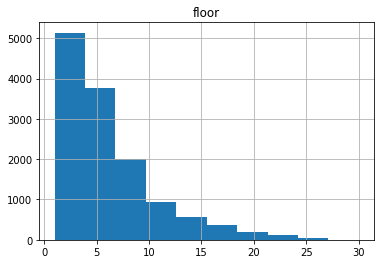
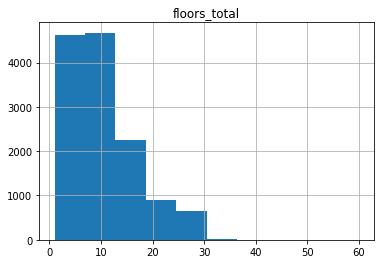

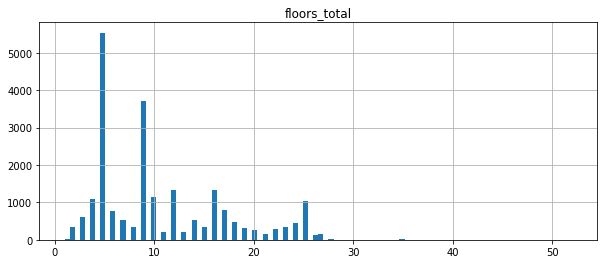

In [43]:
#исправление
df.hist('floors_total', bins=100, figsize=(10, 4))
plt.show()

На графике floors_total по количеству этажей всего в доме больше всего 5 этажных и 9 этажных домов. меньше всего с количеством этажей 1, 28, 35.

### Проведите исследовательский анализ данных

#### Как быстро продавались квартиры?

Text(0, 0.5, 'Частота дней')

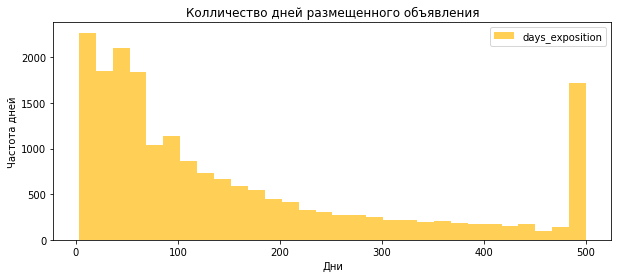

In [44]:
df.hist(column='days_exposition',
        grid=False,
        figsize=(10, 4),
        legend=True,
        bins=30,
        color='#FFCF56')
plt.title('Колличество дней размещенного объявления')
plt.xlabel('Дни')
plt.ylabel("Частота дней")


In [45]:
df['days_exposition'].describe()

count    19556.000000
mean       157.326652
std        153.410786
min          3.000000
25%         45.000000
50%         94.000000
75%        228.000000
max        500.000000
Name: days_exposition, dtype: float64

In [46]:
#Долгие продажи > 400
df[df['days_exposition'] >= 226]['days_exposition'].count()
df[df['days_exposition'] >= 226]['days_exposition'].count() / len(df)#процент долгих продаж

0.21894437533321487

In [47]:
#Без долгих продаж, которые больше 400
df_days_exposition = df.query('days_exposition < 226')
df_days_exposition['days_exposition'].describe()

count    14628.000000
mean        78.244258
std         58.154305
min          3.000000
25%         32.000000
50%         60.000000
75%        116.000000
max        225.000000
Name: days_exposition, dtype: float64

Вывод: Медиана очень сильно отличается от максимального значения. Видимо какие то квартиры продавались очень долго, по гистограмме видно, что квартир, продававшихся 500 дней достаточно много -чуть меньше 1000. Будем считать квартиры продававшиеся больше 226 дней - долгой продажей. Квартир с долгой продажей 4963, это 21%. 
Будем считать квартиры продающиеся меньше 44 дней быстрой продажей.
Если сравнивать медиану с долгими продажами и без, то видно, что медиана без долгих продаж чуть нижу 60. В среднем квартиру продают за 94 дня.
Среднее занчение тоже сильно отличается с быстрыми продажами и без.

#### Факторы влияюющие на общую (полную) стоимость объекта?

 Выясним заимосвязь между стоимостью объектов (last_price) и следующими характеристиками с помощью сводных таблиц:
  - общей площади - total_area
  - жилой площади - living_area
  - площади кухни - kitchen_area
  - типа этажа, на котором расположена квартира (первый, последний, другой) - type_floor
  - количество комнат - rooms
  - даты размещения (день недели, месяц, год) - first_day_exposition, day_week, month, year.

Для этого посторим графики.

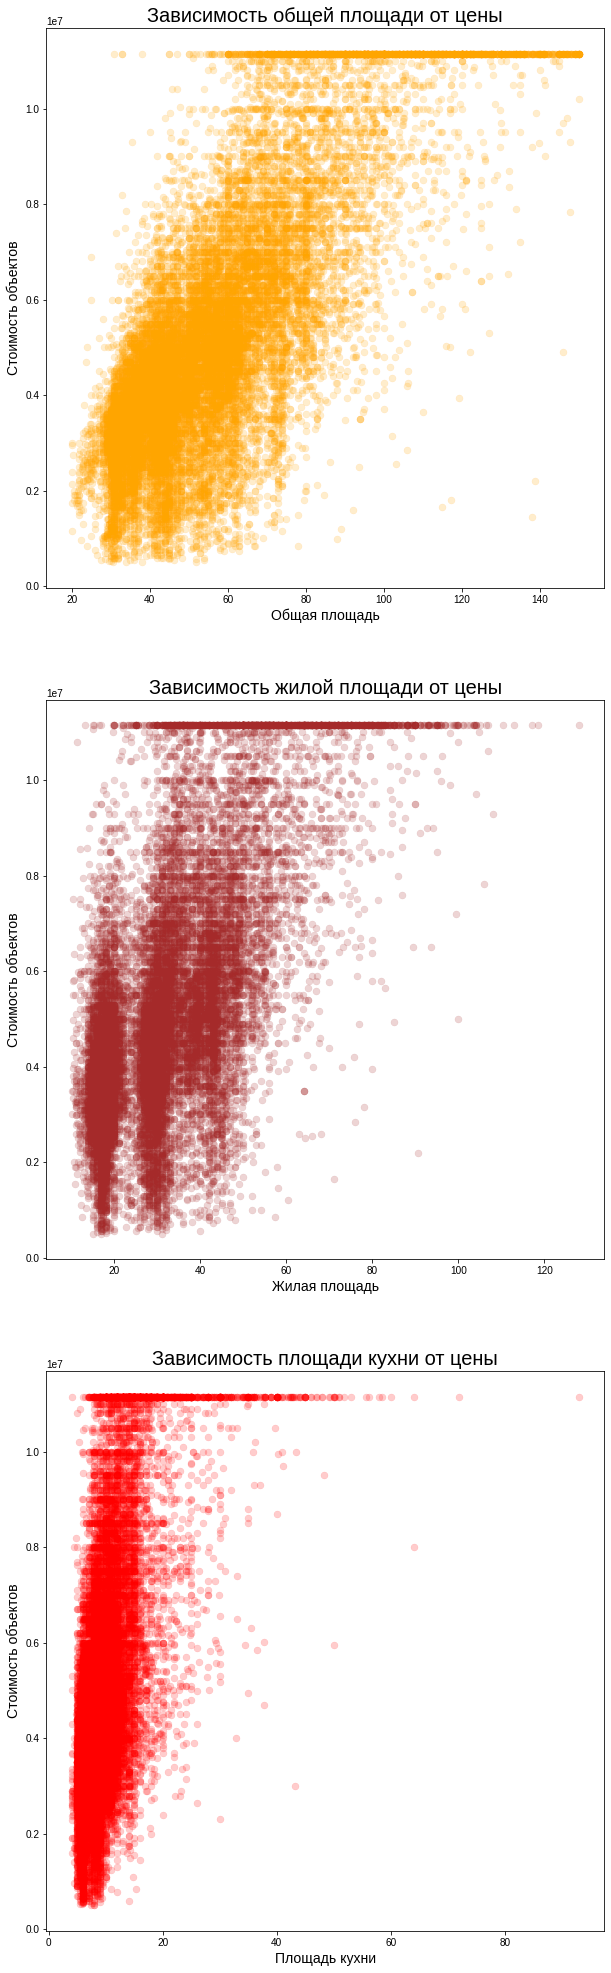

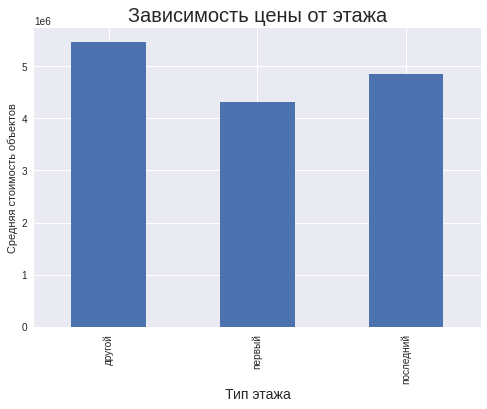

type_floor
другой       5.468713e+06
первый       4.320815e+06
последний    4.846015e+06
Name: last_price, dtype: float64

In [48]:
fig, ax = plt.subplots(3, figsize=(10, 35))
plt.style.use('seaborn')

ax[0].scatter(x = df['total_area'], y = df['last_price'], marker='o', s=50, c='orange', alpha=0.2)
ax[0].set_xlabel("Общая площадь", fontsize = 14)
ax[0].set_ylabel("Стоимость объектов", fontsize = 14)
ax[0].set_title("Зависимость общей площади от цены", fontsize = 20)

ax[1].scatter(x = df['living_area'], y = df['last_price'], marker='o', s=50, c='brown', alpha=0.2)
ax[1].set_xlabel("Жилая площадь", fontsize = 14)
ax[1].set_ylabel("Стоимость объектов", fontsize = 14)
ax[1].set_title("Зависимость жилой площади от цены", fontsize = 20)

ax[2].scatter(x = df['kitchen_area'], y = df['last_price'], marker='o', s=50, c='red', alpha=0.2)
ax[2].set_xlabel("Площадь кухни", fontsize = 14)
ax[2].set_ylabel("Стоимость объектов", fontsize = 14)
ax[2].set_title("Зависимость площади кухни от цены", fontsize = 20)
plt.show()

df.groupby('type_floor')['last_price'].mean().plot.bar()
plt.xlabel("Тип этажа", fontsize = 14)
plt.ylabel("Средняя стоимость объектов")
plt.title("Зависимость цены от этажа", fontsize = 20)
plt.show()

df.groupby('type_floor')['last_price'].mean()



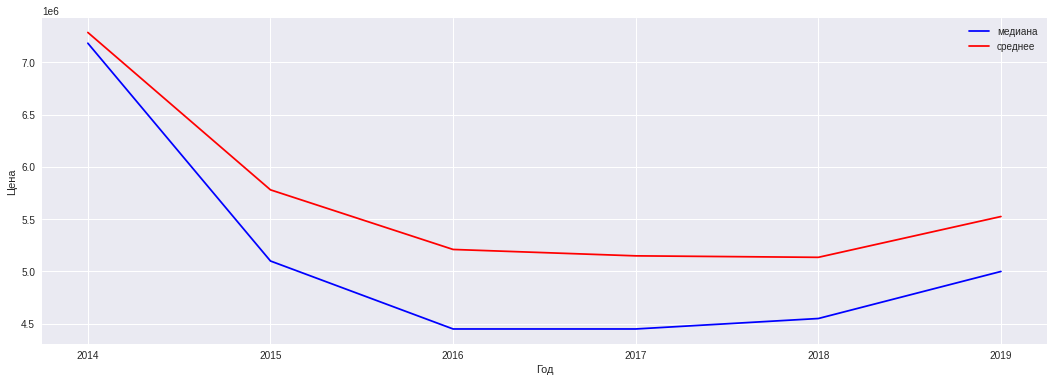

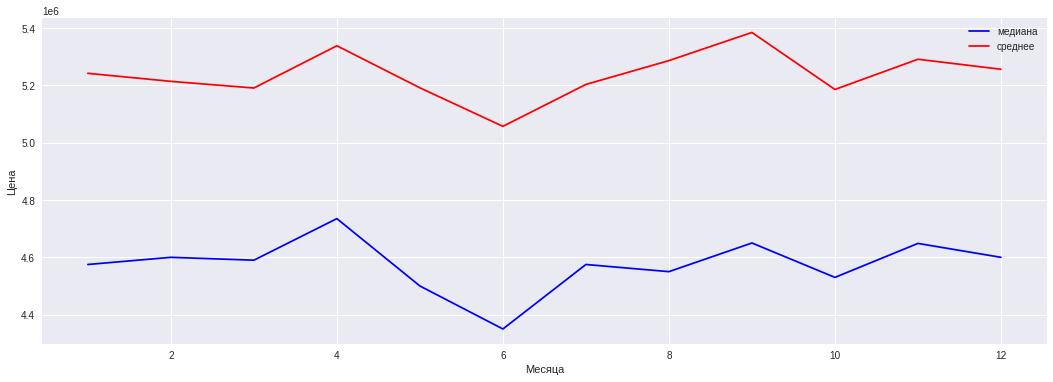

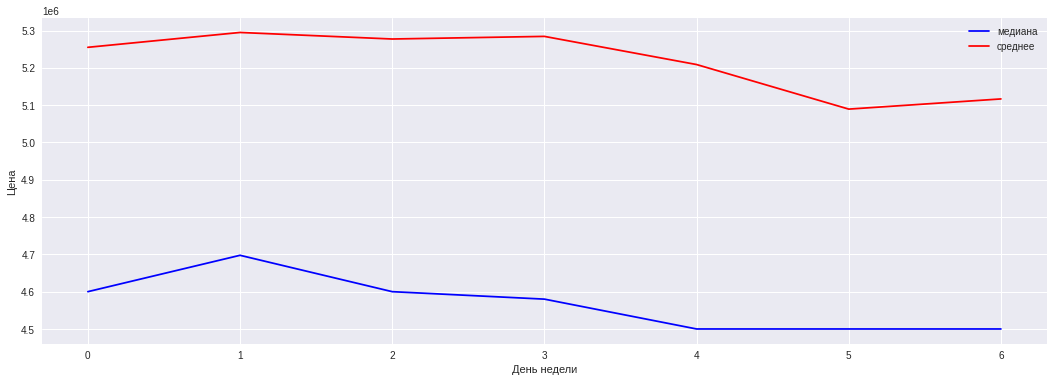

In [49]:
#сравнение цен за год, месяц, день недели
plt.figure(figsize=(18, 6))
df.groupby('year')['last_price'].median().plot(color='blue')
df.groupby('year')['last_price'].mean().plot(color='red')
legend_label = ['медиана', 'среднее' ]
plt.legend(legend_label)
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()


plt.figure(figsize=(18, 6))
df.groupby('month')['last_price'].median().plot(color='blue')
df.groupby('month')['last_price'].mean().plot(color='red')
legend_label = ['медиана', 'среднее' ]
plt.legend(legend_label)
plt.xlabel('Месяца')
plt.ylabel('Цена')
plt.show()

plt.figure(figsize=(18, 6))
df.groupby('day_week')['last_price'].median().plot(color='blue')
df.groupby('day_week')['last_price'].mean().plot(color='red')
legend_label = ['медиана', 'среднее' ]
plt.legend(legend_label)
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

In [50]:
df[['day_week', 'month', 'year', 'total_area', 'living_area', 'kitchen_area', 'type_floor', 'rooms', 'last_price']].corr()


,day_week,month,total_area,living_area,kitchen_area,rooms,last_price
day_week,1.000000,0.010787,-0.012169,-0.007166,-0.012987,-0.001675,-0.019055
month,0.010787,1.000000,0.011769,0.001614,0.008462,0.002709,0.006928
total_area,-0.012169,0.011769,1.000000,0.916506,0.538266,0.784701,0.772435
living_area,-0.007166,0.001614,0.916506,1.000000,0.264523,0.882369,0.654983
kitchen_area,-0.012987,0.008462,0.538266,0.264523,1.000000,0.141873,0.561810
rooms,-0.001675,0.002709,0.784701,0.882369,0.141873,1.000000,0.497947
last_price,-0.019055,0.006928,0.772435,0.654983,0.561810,0.497947,1.000000


По корреляции можем определить линейную зависимось. 
У total_area и last_price высокий коэффицент корреляции 0.773101 видимое есть линейная зависимость. 
У living_area и last_price высокий коэффицент корреляции 0.656434 видимое есть линейная зависимость.
У kitchen_area и last_price  достаточно высокий коэффицент корреляции 0.558358 видимое есть линейная зависимость.
У rooms и total_area корреляция 0.786791. 
У rooms и living_area корреляция 0.877785. 
У living_area и total_area корреляция 0.916267.


In [51]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_week,month,kilometers_cityCenters_nearest
total_images,1.000000,0.174365,0.122537,0.091338,0.032538,0.018440,0.106940,0.036780,0.011909,-0.016157,...,-0.042532,0.028147,-0.035294,0.004625,0.005381,-0.019508,0.124436,-0.009522,0.004223,-0.042015
last_price,0.174365,1.000000,0.772435,0.497947,0.540202,0.162851,0.654983,0.120482,0.025686,-0.020702,...,-0.392721,0.298062,-0.306612,0.325300,0.211556,0.106801,0.579750,-0.019055,0.006928,-0.393445
total_area,0.122537,0.772435,1.000000,0.784701,0.452907,-0.022851,0.916506,-0.017202,0.019288,-0.028638,...,-0.218356,0.164332,-0.154489,0.186380,0.089348,0.146824,-0.028877,-0.012169,0.011769,-0.218708
rooms,0.091338,0.497947,0.784701,1.000000,0.199880,-0.210333,0.882369,-0.156285,-0.007382,-0.024181,...,-0.138970,0.104331,-0.101166,0.083861,0.042379,0.106354,-0.193737,-0.001675,0.002709,-0.138807
ceiling_height,0.032538,0.540202,0.452907,0.199880,1.000000,-0.023184,0.370052,-0.011476,0.053727,0.003912,...,-0.348358,0.264337,-0.229025,0.255151,0.099339,0.112025,0.276515,-0.021672,-0.000152,-0.348952
floors_total,0.018440,0.162851,-0.022851,-0.210333,-0.023184,1.000000,-0.159564,0.677846,-0.022708,0.016748,...,-0.006065,-0.144189,0.117642,-0.034648,0.026247,-0.051080,0.320651,0.010906,0.015267,-0.006719
living_area,0.106940,0.654983,0.916506,0.882369,0.370052,-0.159564,1.000000,-0.114323,0.013392,-0.020057,...,-0.199866,0.165082,-0.152708,0.147369,0.073797,0.131621,-0.118705,-0.007166,0.001614,-0.199972
floor,0.036780,0.120482,-0.017202,-0.156285,-0.011476,0.677846,-0.114323,1.000000,-0.012049,0.011640,...,-0.001384,-0.097808,0.081173,-0.020713,0.020499,-0.041909,0.234443,0.010503,0.019675,-0.001894
is_apartment,0.011909,0.025686,0.019288,-0.007382,0.053727,-0.022708,0.013392,-0.012049,1.000000,-0.000945,...,0.013114,0.013766,0.000994,0.017733,0.022178,-0.000714,0.018028,-0.010087,-0.000074,0.012862
studio,-0.016157,-0.020702,-0.028638,-0.024181,0.003912,0.016748,-0.020057,0.011640,-0.000945,1.000000,...,-0.001556,-0.008104,0.010881,-0.005197,-0.004420,-0.012816,0.006136,-0.003661,-0.008268,-0.001383


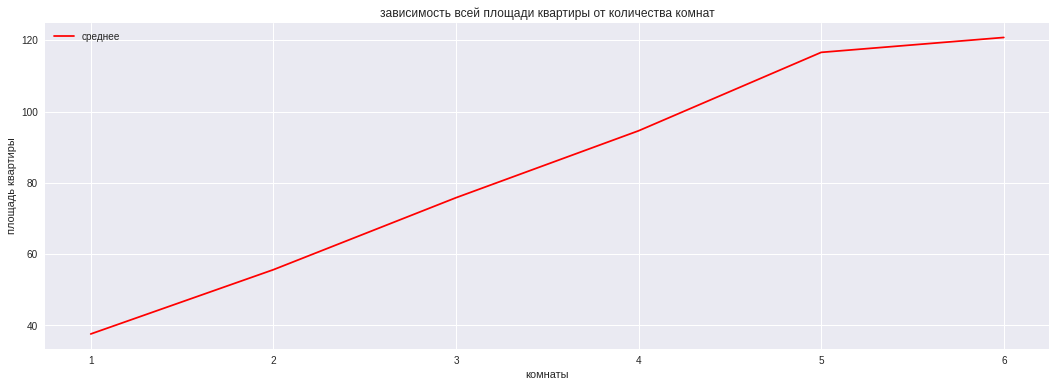

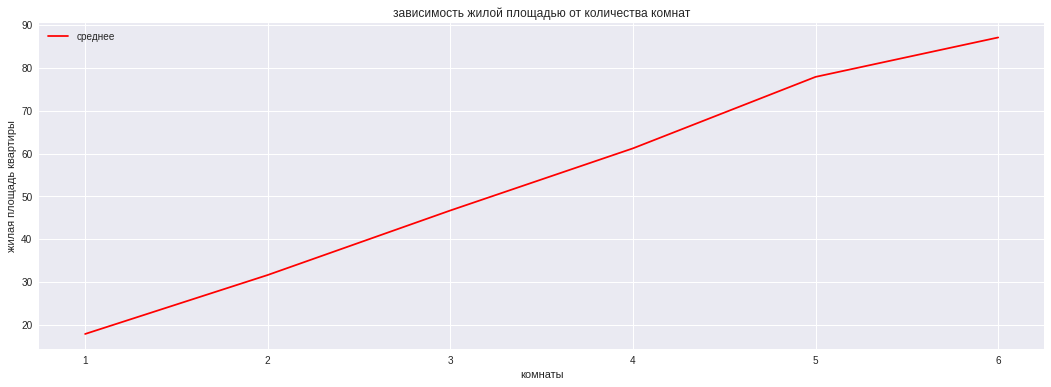

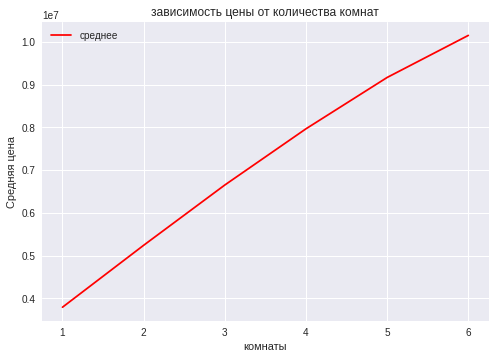

<AxesSubplot:xlabel='rooms'>

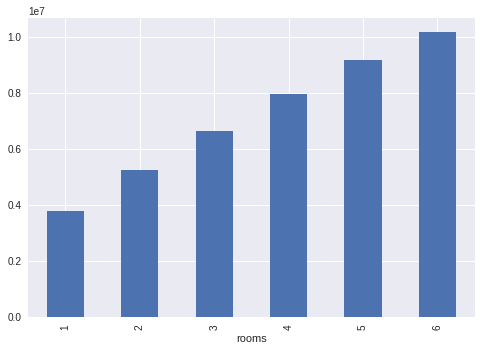

In [52]:
plt.figure(figsize=(18, 6))

df.groupby('rooms')['total_area'].mean().plot(color='red')
legend_label = ['среднее' ]
plt.legend(legend_label)
plt.xlabel('комнаты')
plt.ylabel('площадь квартиры')
plt.title('зависимость всей площади квартиры от количества комнат')
plt.show()

plt.figure(figsize=(18, 6))
df.groupby('rooms')['living_area'].mean().plot(color='red')
legend_label = ['среднее' ]
plt.legend(legend_label)
plt.title('зависимость жилой площадью от количества комнат')
plt.xlabel('комнаты')
plt.ylabel('жилая площадь квартиры')
plt.show()

df.pivot_table(index='rooms', values='last_price').plot(color='red', grid=True)
legend_label = ['среднее' ]
plt.legend(legend_label)
plt.title('зависимость цены от количества комнат')
plt.xlabel('комнаты')
plt.ylabel('Средняя цена')
plt.show()

df.groupby('rooms')['last_price'].mean().plot.bar()

ВЫВОД:

Зависимость от общей площади (total_area): Больше всего квартир от 30 до 80кв.м. находятся в педелах от 1 до 8 миллионов рублей. Так же есть квартиры с квадратурой больше 120 с разным ценовым сегментом. Так как в ценах на квартиру были очень не реальные суммы 8% (они были заменены на предельно возможную сумму) получилось, что около 10% это квартиры с ценой больше 10мил.рублей и их квадратура 60-150. Присытствую аномальные значения нулувая цена и огромная квадратура 110.

Зависимость от жилой площади (living_area): похоже на зависимость предыдущую, больше всего квартир с жилой площадью примероно от 18 до 20кв.м. и с площадью от 22 до 43 стоят до 6,5мил.р, так же присутствуют около 10% квартир с ценой больше 10мил.рублей и их жилая квадратура 30-90. Присытствую аномальные значения нулевая цена но уже жилая квадратура маленькая 40кв.м. 

    В целом для первых двух зависимоятях прослеживается рост цены с ростом квадратуры. 

Зависимость от площади кухни (kitchen_area): можно сказать, что в основном большинство квартир имеют площадь от 5 до 20кв.м. по цене квартир до 8мил.р. 10% квартиры с огромной ценой так же присутсвуют их поладь кухни от 10 до 30. Есть квартиры с очень огромной пощадью кухни больше 40, либо это дома богатых людей (квартиры замки) или не првильно заполенные значния в таблицы. 

Зависимость от типа этажа, на котором расположена квартира (type_floor): сильной зависимости не увидела, во всех трех категориях цены на квартиры разные. Видно что меньше квартир на первом этаже со средней ценой до 4,5мил.р. чем на других этажах. Дороже всего квартиры по типу другие, их средняя цена достигает 5,5мил.р. 
Зависимость от количества комнат (rooms) линейная: чем больше комнат тем в среднем дороже квартира.

Зависимость от даты размещения (день недели, месяц, год: day_week, month, year): До 2016 года цены на квартиры в среднем падали от 7,5 до 5мил.р., затем был рост цен до 2018 года но не сильный, после 2018 рост более резкий стал цены достигли в среднем 5,5милю р. Если говорить про зависимость от месяца то в среднем с января по март цена 5,2-5,4. с марта по опрель резкий скачек а затем спад цены до 5мил. С июня по сентябрь цена опять поднимается до 5,4 и в октябре резкий спад, но после опять набирает цену. Если смотреть по дням недели то зависимости сильно не увидела, по медиане так почти ровная прямая, единственное с понедельника по среду люди продают чуть дороже квартиры чем в субботу и воскресенье. 

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

                 число объявлений  средняя цена 1м^2
locality_name                                       
Санкт-Петербург             14748          105763.93
Мурино                        554           85267.62
Кудрово                       447           95001.53
Шушары                        433           78279.78
Всеволожск                    388           67732.61
Пушкин                        352          100380.35
Колпино                       337           75286.75
Парголово                     322           90448.42
Гатчина                       306           68669.10
Выборг                        227           58127.71


<AxesSubplot:xlabel='locality_name'>

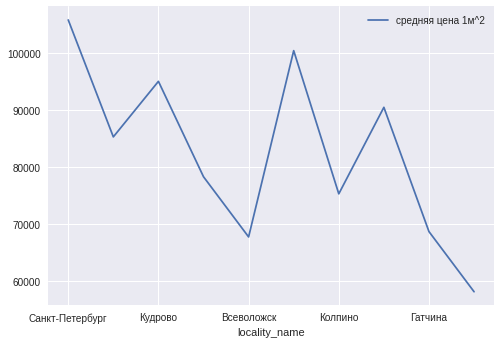

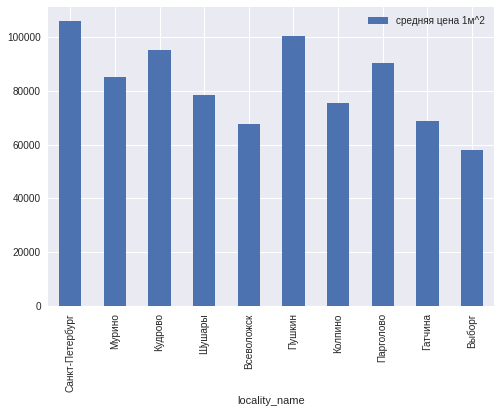

In [53]:
locality_price = df.pivot_table(index='locality_name', values='price_one_meter', aggfunc=['count', 'mean'])
locality_price.columns =['число объявлений', 'средняя цена 1м^2']
locality_price = round(locality_price.sort_values(by='число объявлений', ascending=False).head(10), 2)
print(locality_price)
locality_price.plot(y='средняя цена 1м^2')
locality_price.plot.bar(y='средняя цена 1м^2', stacked=True)

In [54]:
#населённые пункты с самой высокой и низкой стоимостью квадратного метра
df.query('price_one_meter == price_one_meter.min()')['locality_name']
#Санкт-Петербург с минимальной стоимостью 1кв.м.:111.8348623853211р.

df.query('price_one_meter == price_one_meter.max()')['locality_name']
#Санкт-Петербург с максимальной стоимостью 1кв.м.: 312240.0р.

14741    Санкт-Петербург
Name: locality_name, dtype: object

#### Средняя цена каждого километра квартир Санкт-Петербурга.

Округлим столбец с количеством киломентров до центра, чтоб удобнее и нагляднее были данные, и посчитаем среднию цену квартир в Санкт-Петербурге для одинакого удаленных от центра в километрах.

In [55]:
df['kilometers_cityCenters_nearest'] = np.round(df['kilometers_cityCenters_nearest'], decimals = 0)
df_SP = df.query('locality_name == "Санкт-Петербург"')
df_SP = df_SP.pivot_table(index='kilometers_cityCenters_nearest', values='last_price', aggfunc='mean')
df_SP

,last_price
kilometers_cityCenters_nearest,
0.0,9.527857e+06
1.0,9.185437e+06
2.0,8.911351e+06
3.0,8.160471e+06
4.0,8.487554e+06
5.0,8.584479e+06
6.0,8.105710e+06
7.0,7.818690e+06
8.0,7.385175e+06


In [56]:
len(df.query('kilometers_cityCenters_nearest == 27 and locality_name == "Санкт-Петербург"')) / len(df.query('locality_name == "Санкт-Петербург"'))
len(df.query('kilometers_cityCenters_nearest == 27 and locality_name == "Санкт-Петербург"')) / len(df)
#df.query('kilometers_cityCenters_nearest == 27')

8.885729518393461e-05

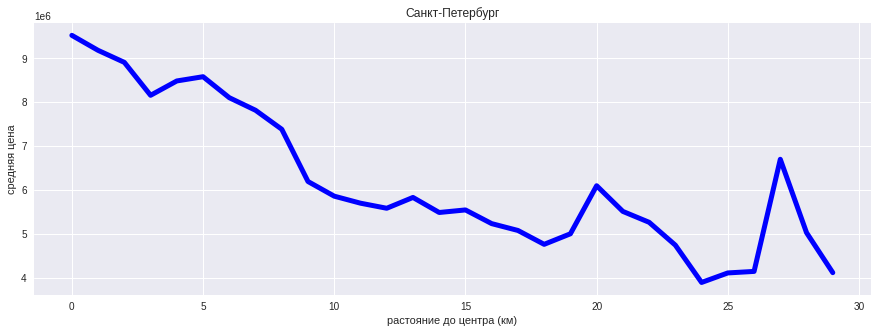

<AxesSubplot:xlabel='kilometers_cityCenters_nearest'>

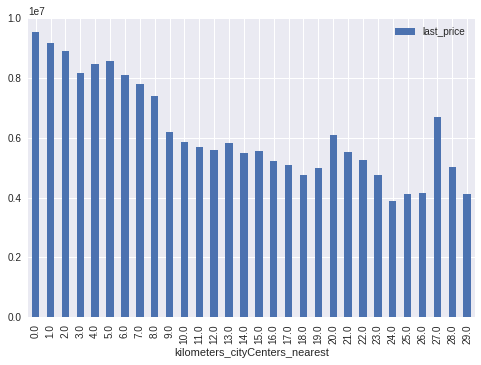

In [57]:
#график
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

ax.plot(df_SP.index, df_SP['last_price'],
        color = 'blue',
        linewidth = 5)
ax.set_title('Санкт-Петербург')
ax.set_xlabel('растояние до центра (км)')
ax.set_ylabel('средняя цена')
plt.show()

df_SP.plot.bar()


Вывод: В целом мы видим, что при нулевом растоянии (т.е. квартиры в центре города) цена начинается от 7 мил. ну и затем чем дальше от центра тем она снижается, хоть и не равномерно. В конце график ведет себя странно, видимо есть большое количество квартир далеких от центра (25-30км) но их цена достигает 6,5мил. Это могут быть квартиры с очень крутым ремонтом либо элитный район - например Петродворцовый район как раз находится в 30км от Центра Санкт-Петербурга, квартира может быть там. 

Получается 8% питерских квартиир от всех находятся на 27км. Если смотреть процент таких квартр на 27км от всех питерских квартир то это 0,01%.  Это всего 2 квартиры, одна достаточно дорогая 11150000р и 2250000р. В среднем это как раз 6,7мил.р как и на графике. Получается просто очень дорогая квартира дает нам такой выброс. 

In [58]:
#len(df.query('kilometers_cityCenters_nearest == 3 and locality_name == "Санкт-Петербург"')['last_price']) / len(df)# 1.2%
#len(df.query('kilometers_cityCenters_nearest == 5 and locality_name == "Санкт-Петербург"')['last_price']) / len(df)# 3.3%
len(df.query('kilometers_cityCenters_nearest == 9 and locality_name == "Санкт-Петербург"')['last_price']) / len(df)# 2.5%
#df.query('kilometers_cityCenters_nearest == 9 and locality_name == "Санкт-Петербург"')

0.0256797583081571

### Общий вывод

В предобработке данных были отредактированны данные, удалены некоторые пропуски в таблицах, которые сильно отличались от возможных значениях, убраны выбросы, но не во всех столбцах. Были изменены тыпы данных столбцов. Большая работа была с аномальными значениями, там мы анализировали процент аномальных значений и думали можно ли убирать их совсем или же заменить другим значением. Выделю столбец last_price, цена на квартиры может быть конечно совершенно разной, но сложно поверить что она может стоить 700мил.р., скорей всего так может стоить котедж. 
В анализе данных были выявлены факторы которые больше всего влияют на объщую стоимость квартиры. Чем больше общая площадь и желая площадь и так же площадь квартиры тем в основном больше стоимость квартиры. Цены квартиры на первом этаже в среднем 4,5мил.р. Так же чем больше комнат тем в основном и больше цена на квартиры. В последние годы цена на квартиры стала подниматься, выше всего ставят цкны на квартиры в мае. 
Проанализировали в целом как быстро продавались квартиры. В среднем квартиру продают за 79 дней. Но обноружеось достаточно много квартир с долгой продажей. 
Была подсчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Больше всего объявлений в Санкт-Петербурге там средняя цена 1кв.км  105893р. Так же минимальная и максимальная стоимость 1кв.км оказалась тоже в Санкт-Петербурге. 
Проанализироваликак стоимость объектов зависит от расстояния до центра города. При нулевом растоянии (т.е. квартиры в центре города) цена начинается от 7 мил. ну и затем чем дальше от центра тем она снижается, хоть и не равномерно. Но так же есть аномалии: квартиры которые очень далеко отцентра но с высокой ценой. 



### Бонус

In [59]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

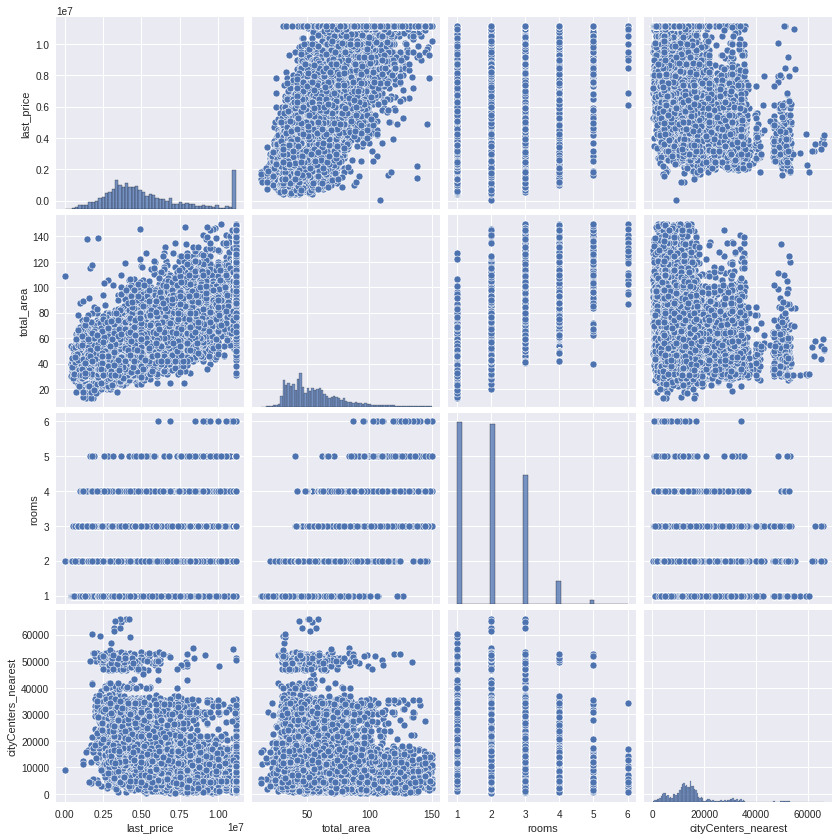

In [60]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


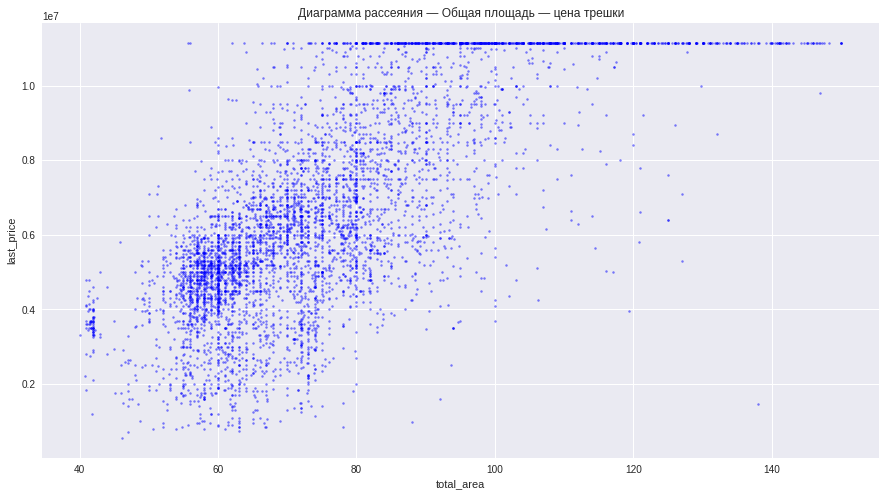

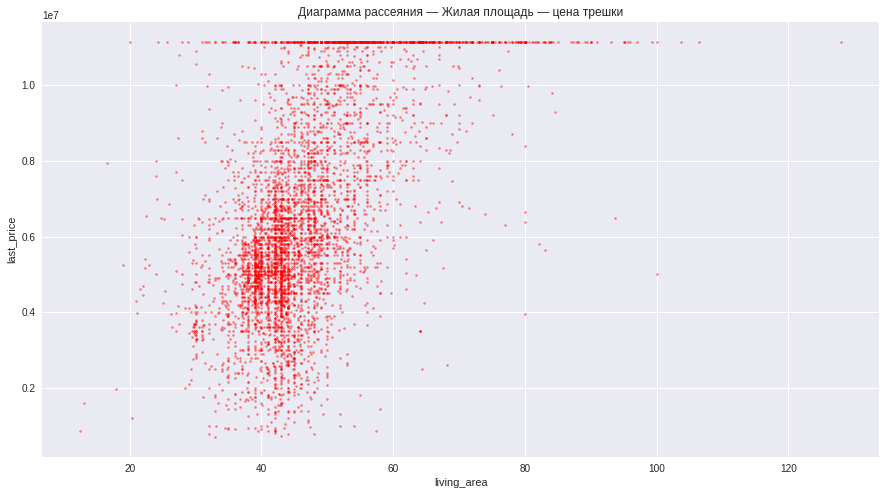

In [61]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

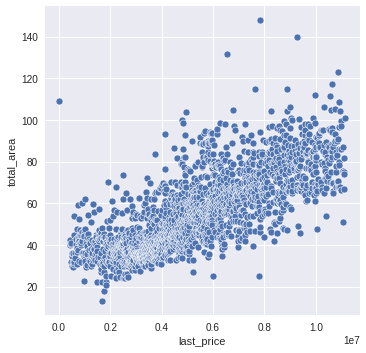

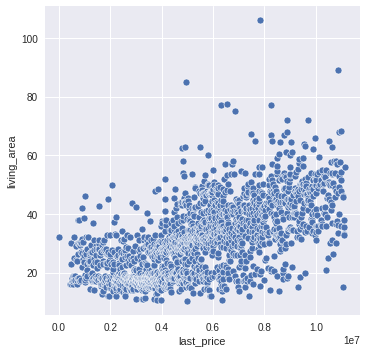

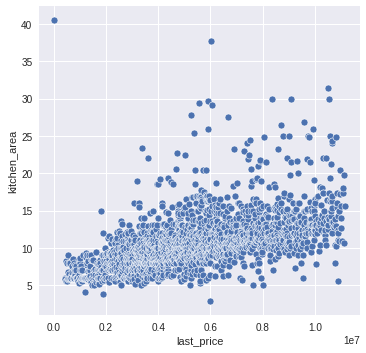

In [62]:
# check
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод